# Capstone Project - Churn Prediction

In [304]:
# Import package

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Avoid some version change warning
import warnings
warnings.filterwarnings("ignore")


## Load Data

In [305]:
#Import data
df = pd.read_csv('DataSet/Potential/Telco-Customer-Churn.csv')

### Data Checking

In [306]:
# Display data in pandas 
df.sample(5).T

,778,4157,490,807,1052
customerID,3758-CKOQL,1685-VAYJF,3552-CTCYF,2798-NYLMZ,7013-PSXHK
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,Yes,Yes,No
Dependents,No,No,Yes,No,No
tenure,59,11,63,71,40
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,Yes,Yes,Yes
InternetService,Fiber optic,DSL,Fiber optic,Fiber optic,DSL
OnlineSecurity,Yes,No,No,Yes,No


In [307]:
# Check dataset shape (number of row & columns)
df.shape

(7043, 21)

In [308]:
# List dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [309]:
# List all features
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [310]:
# Check for null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [311]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [312]:
# Domains, Intervals
# print('- Domains, Intervals')
# for c in df.columns:
#     x = df[c].unique()
#     x.sort()
#     print('+ %-27s: (%-s)' % (c, df[c].dtypes.name))

#     if df[c].dtypes.name != 'object':
#         print('  min: %d, max: %d' % (df[c].min(), df[c].max()))
#     print('  values: %s' % x)

In [313]:
# sns.pairplot(df)

In [314]:
# tenure_churn_no = df[df.Churn == 'No'].tenure
# tenure_churn_yes = df[df.Churn == 'Yes'].tenure
# fig = plt.figure(figsize=(12,6))
# plt.xlabel('tenure')
# plt.ylabel('No of customers')
# plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','blue'], label=['Churn=Yes', 'Churn=No'])
# plt.legend()

In [315]:
# monthly_charges_churn_no = df[df.Churn == 'No'].MonthlyCharges
# monthly_charges_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges
# fig = plt.figure(figsize=(12,6))
# plt.xlabel('MonthlyCharges')
# plt.ylabel('No of customers')
# plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['green','blue'], label=['Churn=Yes', 'Churn=No'])
# plt.legend()

### Data Cleaning & Labelling

In [316]:
# Check unique value in each features 
def print_unique_value(df):
    for column in df:
        if df[column].dtype == 'object':
            print(f'{column}: {df[column].unique()}')

print_unique_value(df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [317]:
# Remove customer ID from data frame
df = df.drop(columns=['customerID'])

In [318]:
# Label Male & Female to 1 & 0
df.gender.replace({'Male':1, 'Female':0}, inplace=True)

In [319]:
# Convert to same words
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [320]:
# columns with yes and no values
yes_no_columns = ['Partner', 
                  'Dependents',
                  'PhoneService', 
                  'MultipleLines', 
                  'OnlineSecurity', 
                  'OnlineBackup',
                  'DeviceProtection', 
                  'TechSupport', 
                  'StreamingTV', 
                  'StreamingMovies', 
                  'PaperlessBilling',
                  'Churn']          

In [321]:
# Convert Yes & No to 1 & 0
for column in yes_no_columns:
    df[column].replace({'Yes':1, 'No':0}, inplace=True)

In [322]:
# Splitting to a new column with 1 & 0 for columns wihout 1 & 0 value
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [323]:
# Change data type from object to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [324]:
df = df.rename({'InternetService_DSL': 'IntService_DSL', 
                'InternetService_Fiber optic': 'IntService_Fiber', 
                'InternetService_No': 'IntService_No',
                'Contract_Month-to-month': 'Contract_Mth', 
                'Contract_One year': 'Contract_1Y', 
                'Contract_Two year': 'Contract_2Y',
                'PaymentMethod_Bank transfer (automatic)': 'PayMethod_Bank', 
                'PaymentMethod_Credit card (automatic)': 'PayMethod_C_Card', 
                'PaymentMethod_Electronic check': 'PayMethod_Electonic', 
                'PaymentMethod_Mailed check': 'PayMethod_Mail'}, axis=1)

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7043 non-null   int64  
 1   SeniorCitizen        7043 non-null   int64  
 2   Partner              7043 non-null   int64  
 3   Dependents           7043 non-null   int64  
 4   tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   int64  
 6   MultipleLines        7043 non-null   int64  
 7   OnlineSecurity       7043 non-null   int64  
 8   OnlineBackup         7043 non-null   int64  
 9   DeviceProtection     7043 non-null   int64  
 10  TechSupport          7043 non-null   int64  
 11  StreamingTV          7043 non-null   int64  
 12  StreamingMovies      7043 non-null   int64  
 13  PaperlessBilling     7043 non-null   int64  
 14  MonthlyCharges       7043 non-null   float64
 15  TotalCharges         7032 non-null   f

In [326]:
df.head().T

,0,1,2,3,4
gender,0.00,1.00,1.00,1.00,0.00
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
Partner,1.00,0.00,0.00,0.00,0.00
Dependents,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
PhoneService,0.00,1.00,1.00,0.00,1.00
MultipleLines,0.00,0.00,0.00,0.00,0.00
OnlineSecurity,0.00,1.00,1.00,1.00,0.00
OnlineBackup,1.00,0.00,1.00,0.00,0.00
DeviceProtection,0.00,1.00,0.00,1.00,0.00


In [327]:
# df = df.replace({'gender': {'Female': 1,'Male': 0}})
# df = df.replace({'Partner': {'Yes': 1,'No': 0}})
# df = df.replace({'Dependents': {'Yes': 1,'No': 0}})
# df = df.replace({'PhoneService': {'Yes': 1,'No': 0}})
# df = df.replace({'MultipleLines': {'Yes': 1,'No': 0}})
# df = df.replace({'OnlineSecurity': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'OnlineBackup': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'DeviceProtection': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'TechSupport': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'StreamingTV': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'StreamingMovies': {'Yes': 1,'No': 0,'No internet service':0}})
# df = df.replace({'PaperlessBilling': {'Yes': 1,'No': 0}})

In [328]:
# df = df.replace({'MultipleLines': {'No phone service': 0}})

In [329]:
# df = df.replace({'InternetService': {'DSL': 1,'Fiber optic': 2, 'No': 0}})

In [330]:
# df = df.replace({'Contract': {'Month-to-month': 0.9,'One year': 1, 'Two year': 2}})

In [331]:
# df = df.replace({'PaymentMethod': {'Mailed check': 1,'Electronic check': 2, 
#                                     'Credit card (automatic)': 3, 'Bank transfer (automatic)': 4}})

In [332]:
# df = df.replace({'Churn': {'Yes': 1,'No': 0}})

## Data Transformation

In [334]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = df.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'median'
)
# Now impute it
imputedData = imputer.fit_transform(values)

In [335]:
imputedData 

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [336]:
scaler = MinMaxScaler(feature_range = (0, 1))
normalizedData = scaler.fit_transform(imputedData)

In [337]:
normalizedData

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [347]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'IntService_DSL', 'IntService_Fiber', 'IntService_No', 'Contract_Mth',
       'Contract_1Y', 'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail'],
      dtype='object')

In [348]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'IntService_DSL', 'IntService_Fiber', 'IntService_No', 'Contract_Mth',
       'Contract_1Y', 'Contract_2Y', 'PayMethod_Bank', 'PayMethod_C_Card',
       'PayMethod_Electonic', 'PayMethod_Mail', 'Churn'
]

In [349]:
# move the data back to a dataframe
df_n = pd.DataFrame.from_records(normalizedData, columns = features)
df_n['Churn'] = df_n['Churn'].astype(np.int8)
df_n.sample(5).T

,3683,1469,1492,3173,1313
gender,1.000000,1.000000,1.000000,0.000000,1.000000
SeniorCitizen,0.000000,0.000000,1.000000,0.000000,0.000000
Partner,1.000000,0.000000,0.000000,1.000000,1.000000
Dependents,0.000000,0.000000,0.000000,0.000000,0.000000
tenure,0.986111,0.513889,0.263889,0.236111,0.652778
PhoneService,1.000000,1.000000,1.000000,1.000000,1.000000
MultipleLines,0.000000,1.000000,1.000000,0.000000,1.000000
OnlineSecurity,1.000000,0.000000,0.000000,0.000000,0.000000
OnlineBackup,0.000000,0.000000,1.000000,0.000000,1.000000
DeviceProtection,0.000000,0.000000,0.000000,0.000000,1.000000


In [350]:
# create X and y to match Scikit-Learn parlance

features = features[0:-1] # discard the first and last columns
outcome = 'Churn'

# X include all the features
X = df_n[features].copy()
# y is the target variable
y = df_n[outcome].copy()

In [351]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_DSL,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [352]:
y

0       0
1       1
2       1
3       0
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int8

In [384]:
y.value_counts()

0    5431
1    1612
Name: Churn, dtype: int64

In [353]:
# Correlation
X_corr = X.corr()
X_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,IntService_DSL,IntService_Fiber,IntService_No,Contract_Mth,Contract_1Y,Contract_2Y,PayMethod_Bank,PayMethod_C_Card,PayMethod_Electonic,PayMethod_Mail
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,-0.008612,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,0.150889,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.150448,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,-0.164221,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,-0.352229,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,0.011942,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,0.040102,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,-0.171226,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,-0.082255,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408
DeviceProtection,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,-0.066160,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351


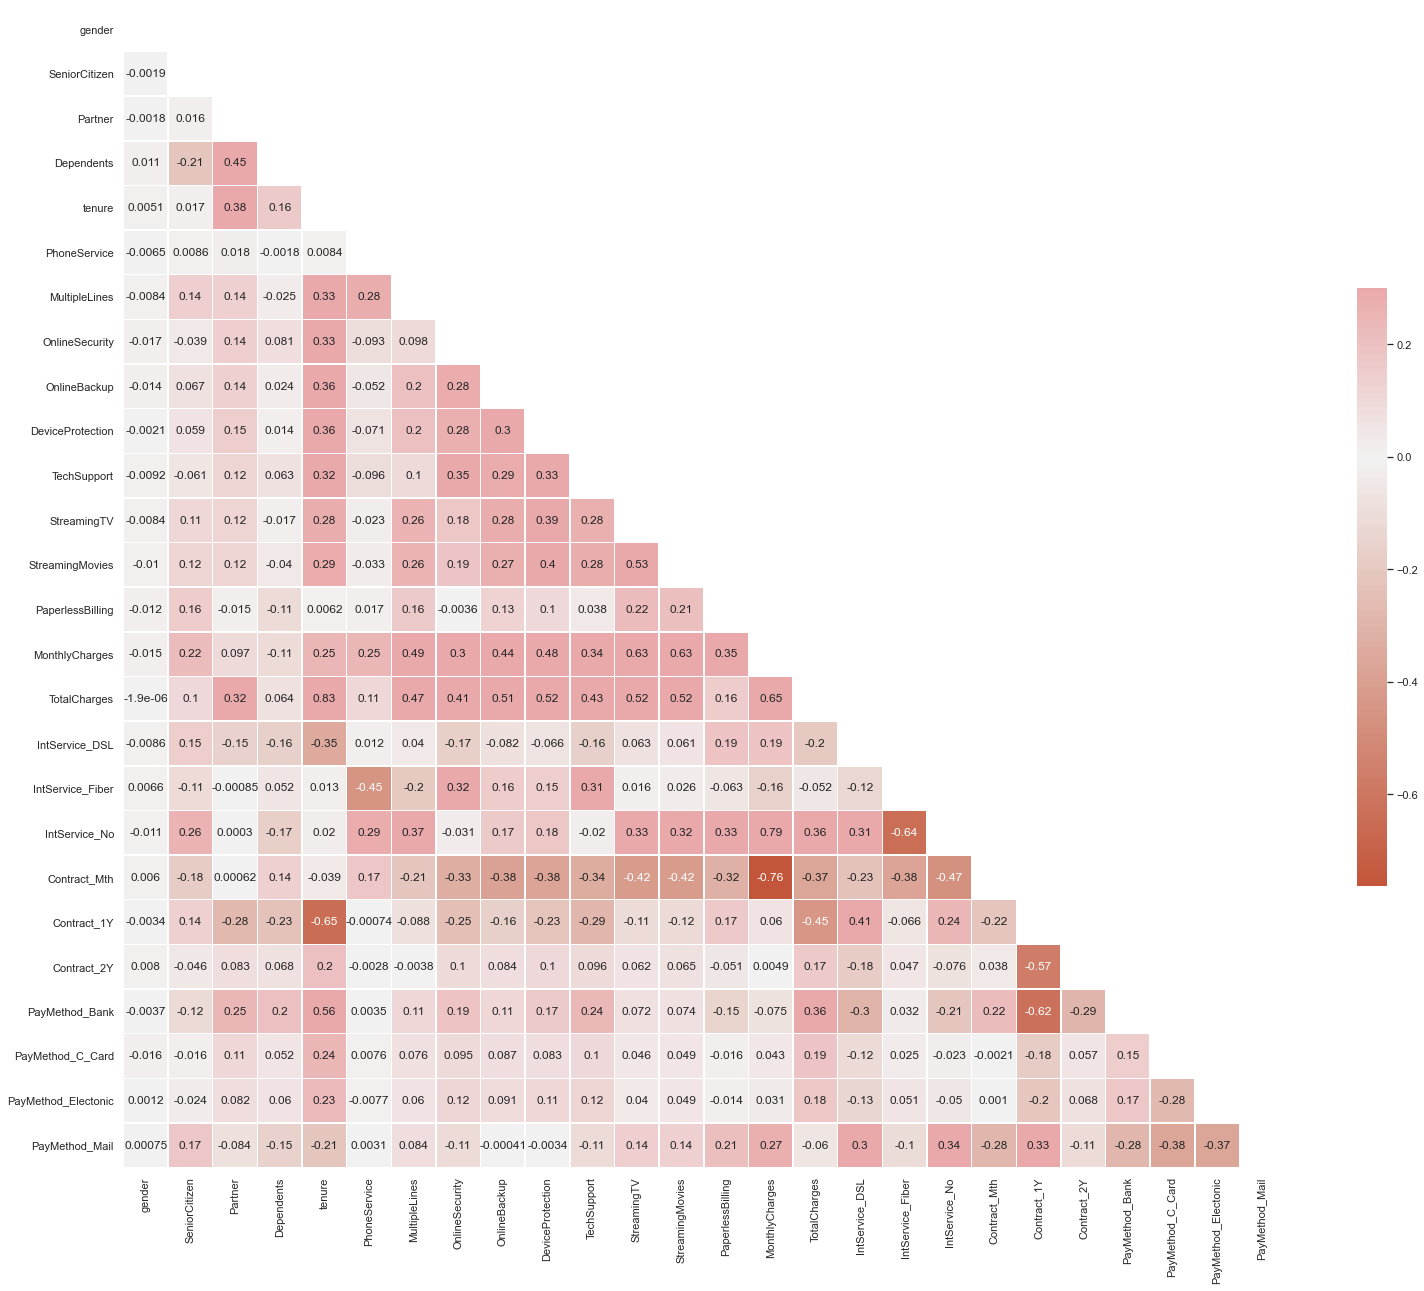

In [357]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(26, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 12, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(X_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

## Split the Data

In [369]:
## Create training and testing subsets
test_size = 0.3

# X = df.iloc[:,:-1] #omit the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 55, stratify = y)

# Apply imputer and scalar pipeline to each of X_train and X_test separately
pipeline = Pipeline([('imputer', imputer), ('scaler', MinMaxScaler())])

# Pipeline is fit to X_train, then applied to both X_train and X_test
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test) 

In [370]:
print(f'X_train shape : {X_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape : (4930, 26)
X_test shape : (2113, 26)
y_train shape : (4930,)
y_test shape : (2113,)


In [373]:
# shuffle=True,  random_state = not used in kfold , because decisiontreeclassifier have random state argument
kfold = KFold(n_splits = 10)
cart = DecisionTreeClassifier(splitter = 'random', random_state = 55)
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 1.0000


In [372]:
num_trees = 100
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 1.0000


In [362]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


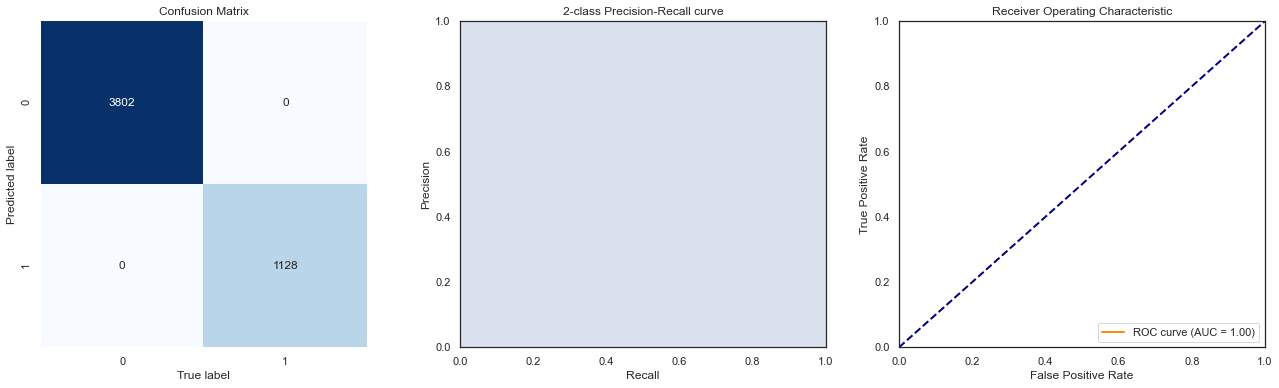


****************
* Bagging (DT) *
****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


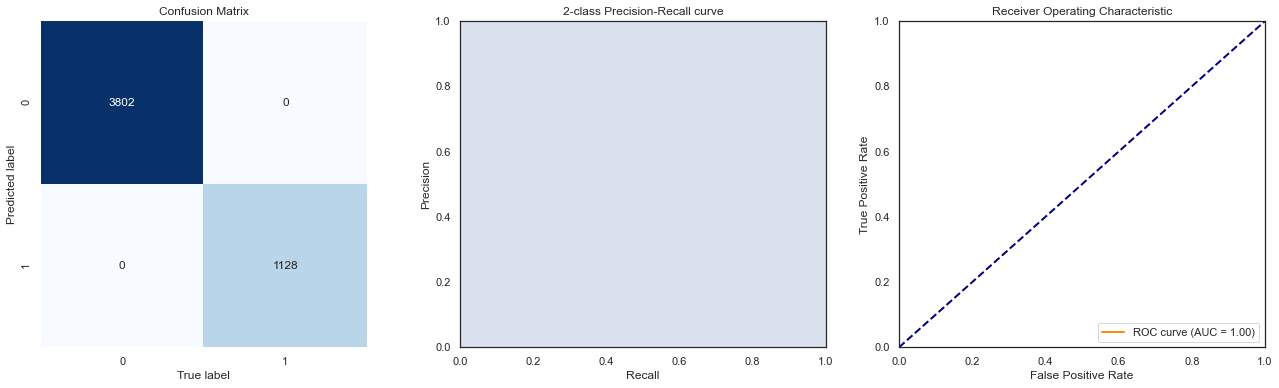

In [363]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([cart, model1]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
#     predictions = m.predict(X_test)
    probabilities = m.predict_proba(X_train)
#     probabilities = m.predict_proba(X_test)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions, probabilities)
#     accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [364]:
# gbm.fit(xx_train, y_train)
predictions = model1.predict(X_test)
probabilities = model1.predict_proba(X_test)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


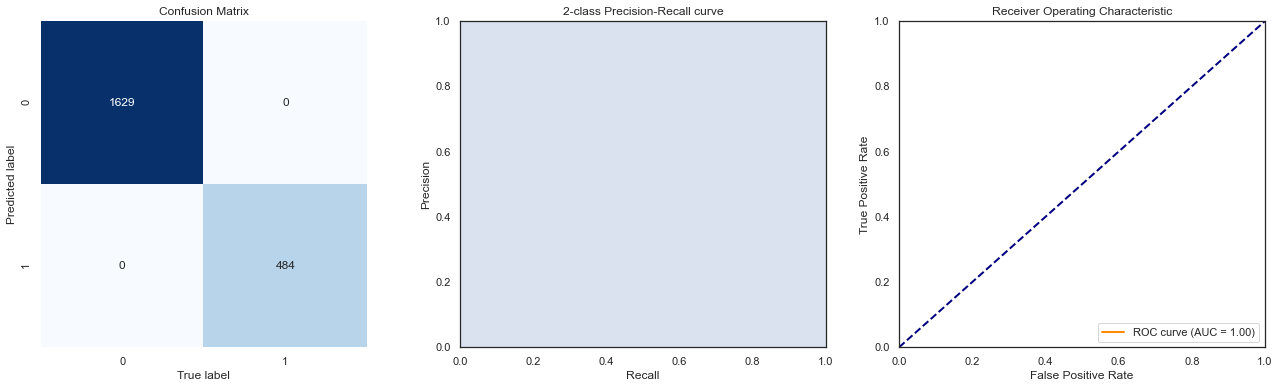

In [365]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Bagging (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [366]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.0,1.0,1.0,1.0
1,Bagging (DT),1.0,1.0,1.0,1.0
2,Bagging (with test),1.0,1.0,1.0,1.0


In [367]:
# Lift chart: try DataRobot
# Lift curve : proportion of probability of test data over probalility prediction of a subset of the data 

def plot_Lift_curve(y_test, predictions, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_test
    aux_lift['predicted'] = predictions
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step) # np.arrange (0,01, 1.01, 0.01)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here) # average of Ratio_ones
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots(figsize=(10,8))
    fig.figsize = (10,10)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()



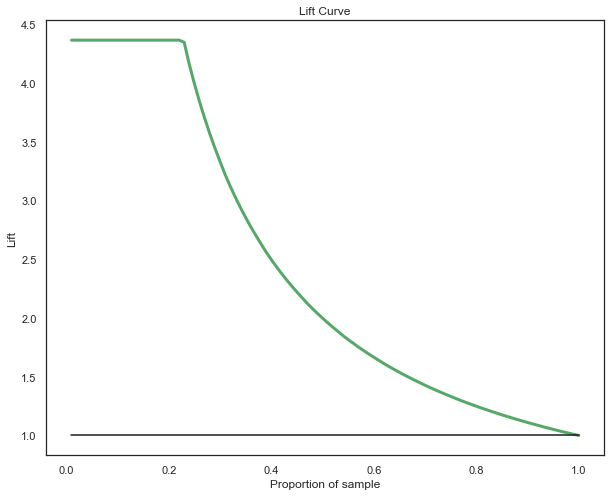

In [368]:
plot_Lift_curve(y_test, predictions)

In [44]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Dont run below code,take time.

In [45]:
np.random.seed(0)

# create the sub models
clf1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
clf1.fit(X_train, y_train)
clf2 = RandomForestClassifier(n_estimators = 10, random_state = 1, n_jobs = -1)
clf2.fit(X_train, y_train)
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
lr = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', n_jobs = -1)
lr.fit(X_train, y_train)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'kneighborsclassifier__weights':['uniform', 'distance'], 
          'randomforestclassifier__n_estimators': [10, 50, 100],
          'randomforestclassifier__criterion': ['gini', 'entropy'],
          'randomforestclassifier__max_depth': [2, 5, 10],
          'meta_classifier__solver': ['liblinear', 'lbfgs'],
          'meta_classifier__C': [0.1, 1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True,
                    n_jobs=-1)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.3f' % grid.best_score_)


0.708 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform', 'meta_classifier__C': 0.1, 'meta_classifier__solver': 'liblinear', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 10}
0.708 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform', 'meta_classifier__C': 0.1, 'meta_classifier__solver': 'liblinear', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 50}
0.708 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform', 'meta_classifier__C': 0.1, 'meta_classifier__solver': 'liblinear', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__n_estimators': 100}
0.708 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform', 'meta_class

In [376]:
# train model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
155/155 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.7840
Epoch 2/10
155/155 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8838
Epoch 3/10
155/155 [==============================] - 0s 1ms/step - loss: 0.1628 - accuracy: 0.9669
Epoch 4/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9970
Epoch 5/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 1.0000
Epoch 6/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 1.0000
Epoch 7/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 8/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 9/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 10/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000

In [378]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000


[0.0041315918788313866, 1.0]

In [379]:
yp = model.predict(X_test)
yp[0:5]

array([[9.9101394e-01],
       [9.9532717e-01],
       [9.7593665e-04],
       [7.2100759e-04],
       [3.5485029e-03]], dtype=float32)

In [380]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [381]:
y_pred[0:10]

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [383]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00       484

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

